In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tabulate

In [6]:
df = pd.read_excel('AngelList data.xlsx')

# fill in empty values
df['Company'].fillna(method='ffill', inplace=True)
df['Size'].fillna(method='ffill', inplace=True)
df['Min Equity'].fillna(0, inplace=True)
df['Max Equity'].fillna(0, inplace=True)

In [7]:
df['Senior'] = df['Job Title (Normalized)'].map(lambda x: 'Senior' in x or 'Manager' in x or 'CTO' in x)
df['Job Title (Normalized)'] = df['Job Title (Normalized)'].map(lambda x: x.replace('Senior ', '').strip())
df['Size'] = df['Size'].map(lambda x: x.strip())
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2
df['Avg Equity'] = (df['Min Equity'] + df['Max Equity']) / 2
df['Count'] = 1
display(df.head())

,Company,Tagline,Size,Job Title,Job Title (Normalized),Min Salary,Max Salary,Min Equity,Max Equity,Senior,Avg Salary,Avg Equity,Count
0,Cushion,"Your bank & credit card fees, refunded",1-10,Machine Learning Engineer,Machine Learning Engineer,120,160,0.25,1.00,False,140.0,0.625,1
1,Cushion,NaN,1-10,Full Stack Engineer,Fullstack Engineer,100,140,0.10,0.75,False,120.0,0.425,1
2,Terrace Consulting,We build technology solutions to help our clie...,11-50,Senior Software Engineer,Software Engineer,120,200,0.05,1.00,True,160.0,0.525,1
3,Terrace Consulting,NaN,11-50,Engineering Manager,Engineering Manager,120,160,1.00,3.00,True,140.0,2.000,1
4,Instrumental,Insights from your assembly line.,11-50,Senior Backend Engineer,Backend Engineer,130,160,0.09,2.00,True,145.0,1.045,1


In [8]:
full = pd.concat([df.groupby(['Job Title (Normalized)'])['Min Salary', 'Max Salary', 'Avg Salary', 'Min Equity', 'Max Equity', 'Avg Equity'].mean(), 
        df.groupby(['Job Title (Normalized)'])['Count'].sum()], axis=1)

round_dict = {
    'Min Equity': 2,
    'Max Equity': 2,
    'Avg Equity': 2, 
    'Min Salary': 0, 
    'Max Salary': 0, 
    'Avg Salary': 0, 
}
full = full.round(round_dict)

#display(full)
print(tabulate.tabulate(full, tablefmt="pipe", headers="keys"))

| Job Title (Normalized)    |   Min Salary |   Max Salary |   Avg Salary |   Min Equity |   Max Equity |   Avg Equity |   Count |
|:--------------------------|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|--------:|
| Backend Engineer          |          113 |          156 |          135 |         0.11 |         0.52 |         0.31 |      36 |
| Data Engineer             |          119 |          164 |          141 |         0.1  |         0.53 |         0.32 |      17 |
| Devops Engineer           |          124 |          164 |          144 |         1.48 |         1.72 |         1.6  |      28 |
| Embedded Engineer         |          108 |          154 |          131 |         0.02 |         0.29 |         0.15 |       7 |
| Engineering Manager       |          150 |          177 |          164 |         0.18 |         0.55 |         0.36 |      12 |
| Frontend Engineer         |          110 |          156 |          133 |         0.15 | 

Min Salary  Max Salary  Avg Salary  \
Job Title (Normalized)    Senior                                       
Backend Engineer          False        104.0       151.0       127.0   
                          True         131.0       167.0       149.0   
Data Engineer             False        115.0       144.0       130.0   
                          True         122.0       178.0       150.0   
Devops Engineer           False        123.0       161.0       142.0   
                          True         127.0       174.0       150.0   
Embedded Engineer         False         77.0       123.0       100.0   
                          True         131.0       178.0       154.0   
Engineering Manager       True         150.0       177.0       164.0   
Frontend Engineer         False         96.0       146.0       121.0   
                          True         125.0       166.0       146.0   
Fullstack Engineer        False        101.0       141.0       121.0   
                          True         115.0       160.0       137.0   
Head of Engineering / CTO True         118.0       163.0       140.0   
Machine Learning Engineer False        109.0       157.0       133.0   
                          True         121.0       166.0       144.0   
Mobile Engineer           False        101.0       152.0       127.0   
                          True         125.0       168.0       146.0   
Software Engineer         False        102.0       149.0       125.0   
                          True         125.0       166.0       145.0   

                                  Min Equity  Max Equity  Avg Equity  Count  
Job Title (Normalized)    Senior                                             
Backend Engineer          False         0.10        0.44        0.27     24  
                          True          0.11        0.68        0.39     12  
Data Engineer             False         0.08        0.23        0.15      7  
                          True          0.11        0.75        0.43     10  
Devops Engineer           False         1.96        2.23        2.09     21  
                          True          0.06        0.20        0.13      7  
Embedded Engineer         False         0.02        0.40        0.21      3  
                          True          0.02        0.20        0.11      4  
Engineering Manager       True          0.18        0.55        0.36     12  
Frontend Engineer         False         0.14        0.59        0.37     19  
                          True          0.17        1.06        0.62     18  
Fullstack Engineer        False         0.18        0.81        0.49     33  
                          True          0.19        0.83        0.51     22  
Head of Engineering / CTO True          2.16        5.06        3.61     24  
Machine Learning Engineer False         0.16        0.84        0.50     22  
                          True          0.19        0.56        0.38     11  
Mobile Engineer           False         0.08        0.48        0.28     19  
                          True          0.18        0.64        0.41     16  
Software Engineer         False         0.11        0.49        0.30     36  
                          True          0.30        1.17        0.74     34

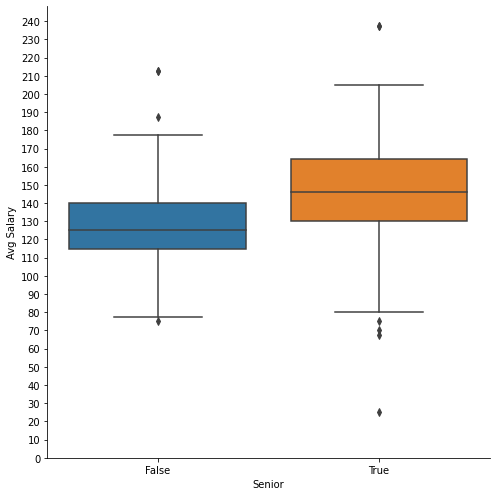

In [9]:
chart = sns.catplot(x='Senior', y='Avg Salary', data=df, height=7, kind='box')
chart.set(yticks=np.arange(0, 250, 10))
#display(df.groupby(['Job Title (Normalized)', 'Senior']).count())
senior_full = pd.concat([df.groupby(['Job Title (Normalized)', 'Senior'])['Min Salary', 'Max Salary', 'Avg Salary', 'Min Equity', 'Max Equity', 'Avg Equity'].mean(),
                         df.groupby(['Job Title (Normalized)', 'Senior'])['Count'].sum() ], axis=1)

senior_full = senior_full.round(round_dict)
display(senior_full)
#print(tabulate.tabulate(senior_full, tablefmt="pipe", headers="keys"))



[]

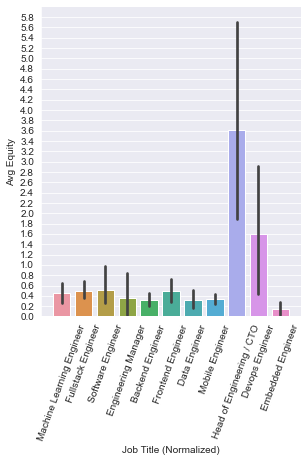

In [23]:
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Equity', data=df, height=5, kind='bar')
chart.set_titles('Equity by Role')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 7, 0.2))
plt.plot()

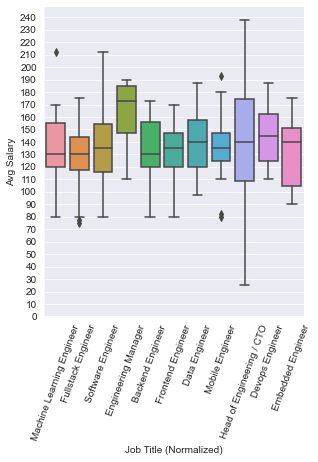

In [22]:
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Salary', data=df, height=5, kind='box')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 250, 10))
plt.show()

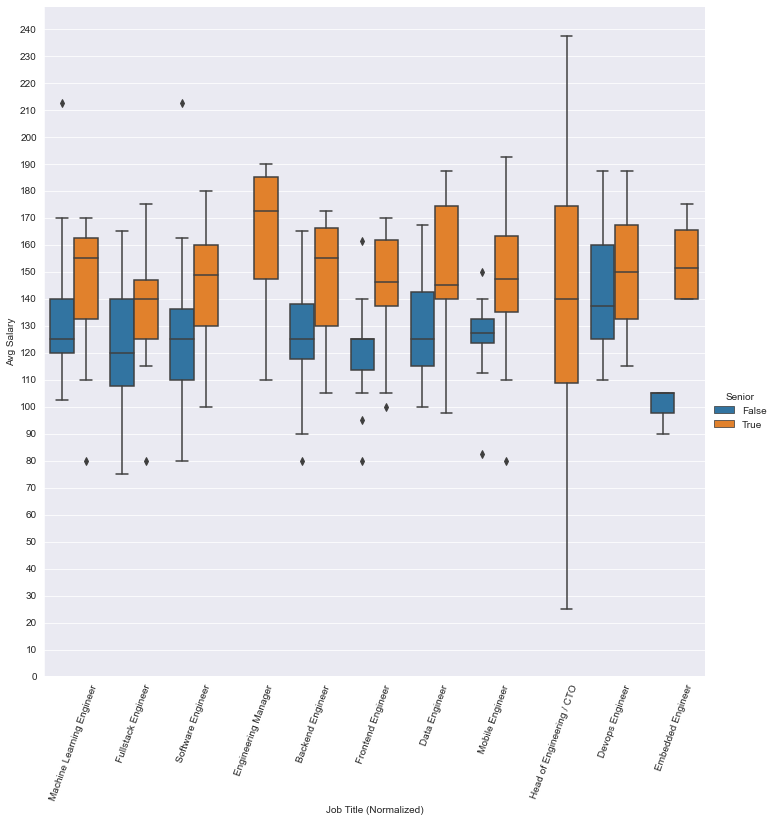

In [12]:
sns.set_style("darkgrid")
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Salary', data=df, height=10, kind='box', hue='Senior')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 250, 10))
plt.show()

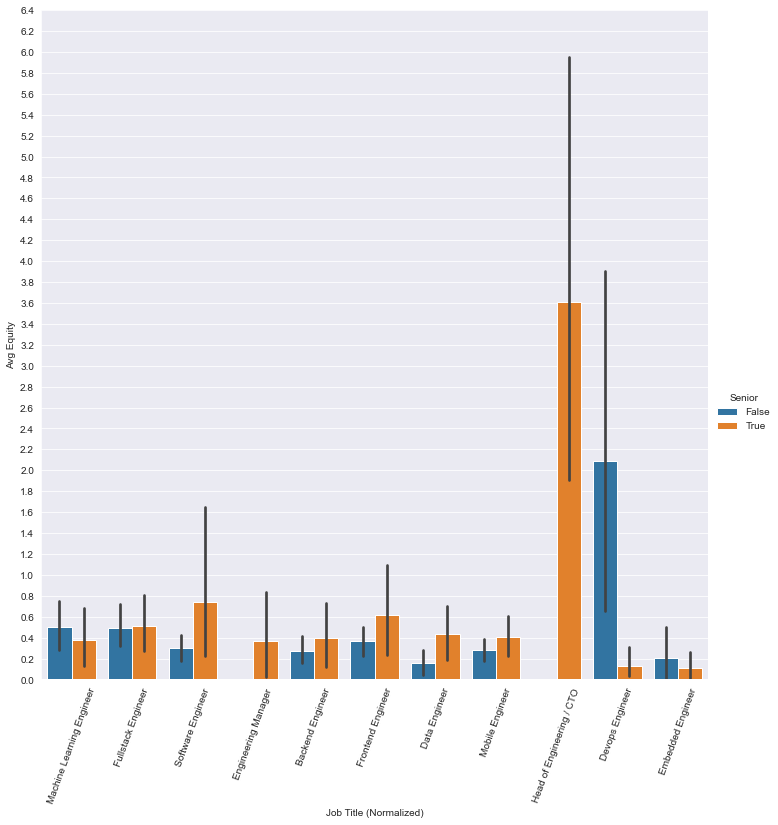

In [13]:
chart = sns.catplot(x='Job Title (Normalized)', y='Avg Equity', data=df, height=10, kind='bar', hue='Senior')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 6.6, 0.2))
plt.show()

,Min Salary,Max Salary,Min Equity,Max Equity,Avg Salary,Avg Equity
Size,,,,,,
1-10,102.692308,146.153846,0.811827,2.481731,124.423077,1.646779
11-50,113.957055,159.300613,0.340104,0.689362,136.628834,0.514733
51-200,127.507692,169.876923,0.018354,0.144323,148.692308,0.081338
201-500,128.750000,169.000000,0.026750,0.251667,148.875000,0.139208
501-1000,156.000000,196.000000,0.000000,0.000000,176.000000,0.000000
1001-5000,111.000000,138.000000,0.000000,0.000000,124.500000,0.000000


11-50        163
1-10         104
51-200        65
201-500       12
501-1000       5
1001-5000      5
Name: Size, dtype: int64

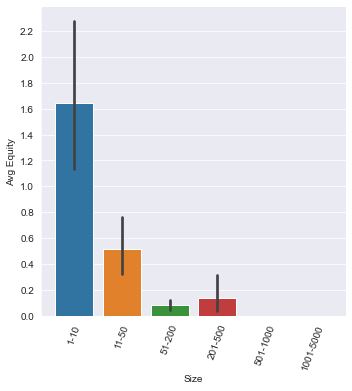

In [14]:
chart = sns.catplot(x='Size', y='Avg Equity', data=df, height=5, kind='bar')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 3, 0.2))
plt.plot()
display(df.groupby(['Size'], sort=False)['Min Salary', 'Max Salary', 'Min Equity', 'Max Equity', 'Avg Salary', 'Avg Equity'].mean())
display(df['Size'].value_counts())



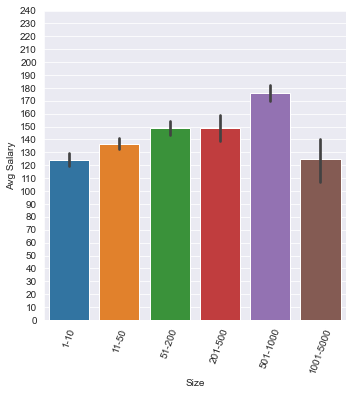

In [15]:
chart = sns.catplot(x='Size', y='Avg Salary', data=df, height=5, kind='bar')
chart.set_xticklabels(rotation=70)
chart.set(yticks=np.arange(0, 250, 10))

,Min Salary,Max Salary,Min Equity,Max Equity,Avg Salary,Avg Equity,Count
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.0
mean,114.189266,157.926554,0.399381,1.081545,136.057910,0.740463,1.0
std,28.038638,31.271365,1.494783,2.674432,27.966596,2.018772,0.0
min,0.000000,50.000000,0.000000,0.000000,25.000000,0.000000,1.0
25%,100.000000,140.000000,0.000000,0.040000,120.000000,0.030000,1.0
50%,115.000000,160.000000,0.043500,0.300000,135.000000,0.187500,1.0
75%,130.000000,180.000000,0.250000,1.000000,155.000000,0.625000,1.0
max,200.000000,275.000000,15.000000,30.000000,237.500000,22.500000,1.0


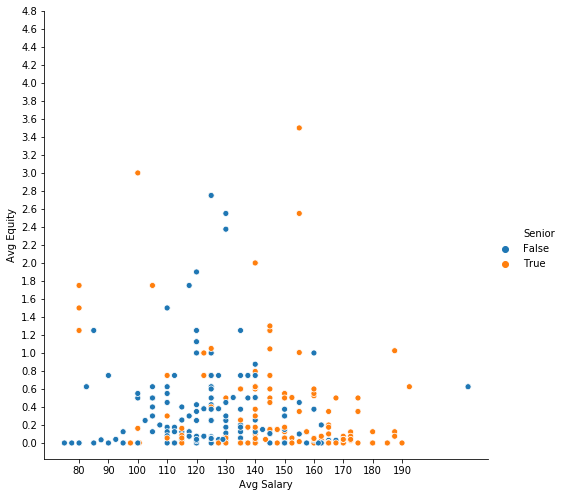

In [11]:
display(df.describe())
filtered_df = df[(df['Job Title (Normalized)'] != 'Head of Engineering / CTO') & (df['Avg Equity'] < 5) ]
chart = sns.relplot(x="Avg Salary", y="Avg Equity", hue="Senior", data=filtered_df, height=7);
chart.set(xticks=np.arange(80, 200, 10))
chart.set(yticks=np.arange(0, 5, 0.2))